In [9]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt

In [4]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:
df = pd.read_csv("spam.tsv", sep='\t')

In [17]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [18]:
#Missing values

df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [19]:
#Identify Dataset size
len(df)

5572

In [20]:
#Count values per label
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [22]:
ham = df[df['label']=='ham']

In [23]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [24]:
spam = df[df['label']=='spam']

In [25]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [28]:
#Verify dataset shapes
ham.shape, spam.shape

((4825, 4), (747, 4))

In [29]:
#Normalize data
ham = ham.sample(spam.shape[0])

In [31]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [32]:
data = ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,Yeah that's the impression I got,32,1
1,ham,"Hmmm ... I thought we said 2 hours slave, not ...",94,11
2,ham,Is ur changes 2 da report big? Cos i've alread...,82,3
3,ham,"Sir, i am waiting for your call.",32,2
4,ham,Haha... Yup hopefully we will lose a few kg b...,97,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


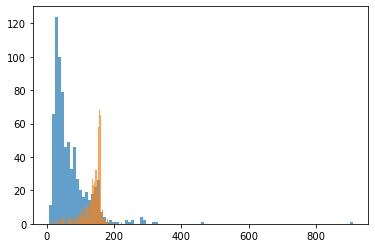

In [35]:
plt.hist(data[data['label']=='ham']['length'],bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'],bins = 100, alpha = 0.7)
plt.show()

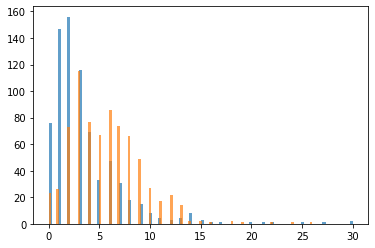

In [37]:
plt.hist(data[data['label']=='ham']['punct'],bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'],bins = 100, alpha = 0.7)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
data.head()

,label,message,length,punct
0,ham,Yeah that's the impression I got,32,1
1,ham,"Hmmm ... I thought we said 2 hours slave, not ...",94,11
2,ham,Is ur changes 2 da report big? Cos i've alread...,82,3
3,ham,"Sir, i am waiting for your call.",32,2
4,ham,Haha... Yup hopefully we will lose a few kg b...,97,4


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle=True, stratify=data['label'])

In [47]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Very strange.  and  are watching the 2nd one n...
477                          Jay told me already, will do
542                          Kothi print out marandratha.
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     Well welp is sort of a semiobscure internet thing
268        I jokin oni lar.. Ü busy then i wun disturb ü.
272              My sister got placed in birla soft da:-)
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [48]:
vectorizer = TfidfVectorizer()

In [49]:
X_train = vectorizer.fit_transform(X_train)

In [50]:
X_train.shape

(1045, 3653)

In [51]:
X_train

<1045x3653 sparse matrix of type '<class 'numpy.float64'>'
	with 17659 stored elements in Compressed Sparse Row format>

In [57]:
#Pipeline and Classifier

clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [58]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [59]:
y_pred = clf.predict(X_test)

In [60]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 22, 202]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       225
        spam       1.00      0.90      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [62]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [69]:
clf.predict(["Congratulations! You have won a free trip to Cancun in Mexico"])

array(['spam'], dtype=object)